# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [137]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [138]:
path <- "data/test.xlsx"

In [139]:
group <- "kn1" #ek2

In [140]:
test_data <- read_excel(path, sheet = group)
keys_data <- read_excel(path, sheet = "keys")

In [141]:
colnames(test_data) <- c("No", "Std", "Group", "V", paste0("Q", 1:20), "Check")
test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,C,C,C,C,C,B,...,C,C,B,C,B,B,A,A,B,NA
2,Андрощук Роман Вікторович,КН-1(5)-1,1,B,C,C,C,B,A,...,C,C,C,B,B,A,C,C,B,NA
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA


In [142]:
test_data <- test_data |>
    #mutate(Std = "****** ****") |>
    mutate_at(colnames(test_data)[5:24], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(contains("Q"), ~replace_na(.x, "X")))
#head(test_data)

test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,C,C,C,C,C,B,...,C,C,B,C,B,B,A,A,B,NA
2,Андрощук Роман Вікторович,КН-1(5)-1,1,B,C,C,C,B,A,...,C,C,C,B,B,A,C,C,B,NA
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA


## 3. Перевірка правильності обчислень

In [143]:
test_data_check <- test_data |> filter(!is.na(Check))
test_data_check

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,D,A,C,C,...,C,C,C,B,D,B,A,C,B,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,C,B,A,D,A,...,D,C,B,C,C,D,A,D,D,8.25
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,D,A,D,B,D,B,...,C,B,B,A,B,C,B,B,C,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,C,B,B,D,B,C,...,C,D,A,B,A,C,B,D,A,4.50
54,Стуга Едуард Леонідович,КН-1(5)-1,8,B,D,D,D,B,D,...,D,C,C,A,B,A,B,D,C,3.00


## 3.1. Перевірка для непарних варіантів

In [144]:
test_data_np <- test_data_check |> filter(V %% 2 == 1)
test_data_np

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,D,A,C,C,...,C,C,C,B,D,B,A,C,B,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,C,B,A,D,A,...,D,C,B,C,C,D,A,D,D,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,C,B,B,D,B,C,...,C,D,A,B,A,C,B,D,A,4.50


In [145]:
test_data_np |> slice(1)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,D,A,C,C,...,C,C,C,B,D,B,A,C,B,6


In [146]:
test1_data <- data.frame(Answers = test_data_np |> slice(3) |> select(Q1:Q20) |> unlist(), Keys = keys_data$V1) |>
    mutate(Check = ifelse(Answers == Keys, 1, 0))
test1_data
sum(test1_data$Check*0.75)

,Answers,Keys,Check
,<fct>,<chr>,<dbl>
Q1,C,C,1
Q2,B,C,0
Q3,B,C,0
Q4,D,D,1
Q5,B,D,0
Q6,C,C,1
Q7,A,A,1
Q8,D,C,0
Q9,D,A,0


[1] 4.5

In [147]:
test_data_np |> slice(2)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,C,B,A,D,A,...,D,C,B,C,C,D,A,D,D,8.25


In [148]:
test1_data <- data.frame(Answers = test_data_np |> slice(2) |> select(Q1:Q20) |> unlist(), Keys = keys_data$V1) |>
    mutate(Check = ifelse(Answers == Keys, 1, 0))
test1_data
sum(test1_data$Check*0.75)

,Answers,Keys,Check
,<fct>,<chr>,<dbl>
Q1,C,C,1
Q2,C,C,1
Q3,B,C,0
Q4,A,D,0
Q5,D,D,1
Q6,A,C,0
Q7,A,A,1
Q8,B,C,0
Q9,B,A,0


[1] 8.25

In [149]:
answers_matrix <-  test_data_np |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,D,A,C,C,B,C,A,A,C,C,C,C,B,D,B,A,C,B
C,C,B,A,D,A,A,B,B,B,D,D,C,B,C,C,D,A,D,D
C,B,B,D,B,C,A,D,D,B,D,C,D,A,B,A,C,B,D,A


In [199]:
test_keys <- keys_data$V1

In [207]:
getFinalGrades <- function(data, keys) {
    answers_matrix <-  data |> select(Q1:Q20) |> as.matrix()
    final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

    for(i in 1:ncol(answers_matrix)) 
    {
        final_matrix[,i] <- ifelse(answers_matrix[, i] == keys[i], 1, 0)
    }
    colnames(final_matrix) <- colnames(answers_matrix)
    rownames(final_matrix) <- data$Std
    grade <- 15/20

    final_grades <- data |> select(1:4) |>
        bind_cols(as.data.frame(final_matrix)) |>
        bind_cols(data |> select(Check)) |>
        rowwise() |>
        mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
        mutate(Grade = Correct * grade)
    
    final_grades
}

In [208]:
getFinalGrades(test_data_np, keys_data$V1)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,1,1,0,0,0,1,...,0,0,0,0,1,0,0,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,1,1,0,0,1,0,...,1,1,0,1,1,0,0,8.25,11,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,1,0,0,1,0,1,...,0,0,0,0,0,0,1,4.50,6,4.50


In [151]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- test_data_np$Std
final_matrix

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Котюк Богдан Юрійович,1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0
Нечипорук Марія Ярославівна,1,1,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,0,0
Остапчук Микола Валентинович,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [152]:
grade <- 15/20

final_grades <- test_data_np |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data_np |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix) <- colnames(answers_matrix)

final_grades |> select(1:4, 25:27)

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,8.25,11,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,4.50,6,4.50


## 3.2. Перевірка для парних варіантів

In [209]:
test_data_p <- test_data_check |> filter(V %% 2 == 0)
test_data_p

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,D,A,D,B,D,B,...,C,B,B,A,B,C,B,B,C,3.00
54,Стуга Едуард Леонідович,КН-1(5)-1,8,B,D,D,D,B,D,...,D,C,C,A,B,A,B,D,C,3.00


In [211]:
getFinalGrades(test_data |>, keys_data$V2)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,0,0,1,1,0,1,...,0,1,0,1,0,0,0,5.25,7,5.25
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,0,0,0,0,0,0,...,0,1,0,1,0,0,0,3.00,4,3.00
54,Стуга Едуард Леонідович,КН-1(5)-1,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,3.00,4,3.00


In [154]:
test2_data <- data.frame(Answers = test_data_p |> slice(3) |> select(Q1:Q20) |> unlist(), Keys = keys_data$V2) |>
    mutate(Check = ifelse(Answers == Keys, 1, 0))
test2_data
sum(test2_data$Check*0.75)

,Answers,Keys,Check
,<fct>,<chr>,<dbl>
Q1,B,С,0
Q2,D,B,0
Q3,D,A,0
Q4,D,C,0
Q5,B,B,1
Q6,D,C,0
Q7,D,D,1
Q8,C,A,0
Q9,C,D,0


[1] 3

In [155]:
answers_matrix <-  test_data_p |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
B,C,A,C,A,C,D,D,C,B,A,D,D,B,A,B,C,D,D,C
D,A,D,B,D,B,A,C,A,D,B,C,B,B,A,B,C,B,B,C
B,D,D,D,B,D,D,C,C,B,D,D,C,C,A,B,A,B,D,C


In [156]:
correct_answers <- keys_data$V2
correct_answers

[1] "С" "B" "A" "C" "B" "C" "D" "A" "D" "D" "A" "C" "C" "A" "A" "D" "C" "A" "C"
[20] "D"

In [157]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- test_data_p$Std
final_matrix

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Башмаков Богдан Олегович,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0
Онуфрієнко Владислава Вікторівна,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
Стуга Едуард Леонідович,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [158]:
grade <- 15/20

final_grades <- test_data_p |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data_p |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix) <- colnames(answers_matrix)

final_grades |> select(1:4, 25:27)

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,5.25,7,5.25
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,3.00,4,3.00
54,Стуга Едуард Леонідович,КН-1(5)-1,8,3.00,4,3.00


## 4. Обчислення для варіантів

### 4.1. Варівнт 1

In [219]:
getFinalGrades(test_data |> filter(V %% 2 == 1), keys_data$V1) |>
    select(Std, Group, V, Check, Correct, Grade)

Std,Group,V,Check,Correct,Grade
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Анпілогов Антон Юрійович,КН-1(5)-5,3,NA,12,9.00
Андрощук Роман Вікторович,КН-1(5)-1,1,NA,6,4.50
Войтюк Назарій Васильович,КН-1(5)-1,9,NA,4,3.00
Воробей Юрій Вікторович,КН-1(5)-1,7,NA,10,7.50
Герасимчук Наталія Миколаївна,КН-1(5)-1,7,NA,9,6.75
Гомон Христина Вікторівна,КН-1(5)-1,5,NA,8,6.00
Гулієв Артур Борисович,КН-1(5)-1,3,NA,9,6.75
Гулюк Станіслав Юрійович,КН-1(5)-1,9,NA,2,1.50
Дячук Дарина Олегівна,КН-1(5)-2,1,NA,5,3.75


In [218]:
getFinalGrades(test_data |> filter(V %% 2 == 0), keys_data$V2) |>
    select(Std, Group, V, Check, Correct, Grade)

Std,Group,V,Check,Correct,Grade
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Басок Максим Олександрович,КН-1(5)-3,4,NA,6,4.50
Башмаков Богдан Олегович,КН-1(5)-1,8,5.25,7,5.25
Бенедик Олександр Сергійович,КН-1(5)-5,2,NA,7,5.25
Боженко Анастасія Ігорівна,КН-1(5)-1,6,NA,11,8.25
Власенко Андрій Максимович,КН-1(5)-1,6,NA,5,3.75
Грицаюк Богдан Вікторович,КН-1(5)-1,8,NA,3,2.25
Долженко Дмитро Юрійович,КН-1(5)-2,6,NA,5,3.75
Івасюк Денис Михайлович,КН-1(5)-2,4,NA,3,2.25
Йойна Дарина Сергіївна,КН-1(5)-2,4,NA,6,4.50


In [168]:
answers_matrix_v1 <-  test_data_v1 |> select(Q1:Q20) |> as.matrix()
rownames(answers_matrix_v1) <- test_data_v1$Std
answers_matrix_v1 |> head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Анпілогов Антон Юрійович,C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
Андрощук Роман Вікторович,B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B
Войтюк Назарій Васильович,C,C,B,C,C,A,D,B,A,C,A,C,B,C,D,D,B,B,A,B
Воробей Юрій Вікторович,X,C,B,A,C,X,B,C,A,A,D,C,C,B,C,B,X,X,X,A
Герасимчук Наталія Миколаївна,C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
Гомон Христина Вікторівна,C,B,A,B,D,A,A,C,D,A,C,B,C,A,D,D,A,D,A,A


In [169]:
correct_answers_v1 <- keys_data$V1
correct_answers_v1

[1] "C" "C" "C" "D" "D" "C" "A" "C" "A" "A" "D" "D" "C" "B" "C" "B" "D" "A" "A"
[20] "A"

In [171]:
final_matrix_v1 <- matrix(FALSE, nrow = nrow(answers_matrix_v1), ncol = ncol(answers_matrix_v1))

for(i in 1:ncol(answers_matrix_v1)) 
{
    final_matrix_v1[,i] <- ifelse(answers_matrix_v1[, i] == correct_answers_v1[i], 1, 0)
}
colnames(final_matrix_v1) <- colnames(answers_matrix_v1)
rownames(final_matrix_v1) <- test_data_v1$Std

In [174]:
final_matrix_v1 |> head(n = 10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Анпілогов Антон Юрійович,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0
Андрощук Роман Вікторович,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
Войтюк Назарій Васильович,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Воробей Юрій Вікторович,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,1
Герасимчук Наталія Миколаївна,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0
Гомон Христина Вікторівна,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1
Гулієв Артур Борисович,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0
Гулюк Станіслав Юрійович,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Дячук Дарина Олегівна,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
Злотенко Андрій Вікторович,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [175]:
grade <- 15/20

final_grades_v1 <- test_data_v1 |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix_v1)) |>
    bind_cols(test_data_v1 |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix_v1) <- colnames(answers_matrix_v1)

In [176]:
final_grades_v1 |> select(1:4, 25:27) |> filter(!is.na(Check))

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,8.25,11,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,4.50,6,4.50


### 4.2. Варіант 2

In [194]:
test_data_v2 <- test_data |> filter(V %% 2 == 0)
head(test_data_v2, n = 10)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA
7,Власенко Андрій Максимович,КН-1(5)-1,6,A,B,D,C,B,A,...,B,B,C,A,B,D,A,D,C,NA
12,Грицаюк Богдан Вікторович,КН-1(5)-1,8,C,B,D,B,A,B,...,B,A,C,A,C,D,C,B,C,NA
15,Долженко Дмитро Юрійович,КН-1(5)-2,6,D,A,A,C,D,B,...,C,A,B,A,C,A,D,A,C,NA
18,Івасюк Денис Михайлович,КН-1(5)-2,4,B,A,D,A,D,C,...,A,D,C,D,D,A,B,B,C,NA
19,Йойна Дарина Сергіївна,КН-1(5)-2,4,C,C,C,C,B,C,...,C,B,C,B,A,C,C,B,A,NA


In [195]:
answers_matrix_v2 <-  test_data_v2 |> select(Q1:Q20) |> as.matrix()
rownames(answers_matrix_v2) <- test_data_v2$Std
answers_matrix_v2 |> head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Басок Максим Олександрович,C,A,D,D,B,C,D,A,A,C,D,C,A,C,B,B,D,A,B,C
Башмаков Богдан Олегович,B,C,A,C,A,C,D,D,C,B,A,D,D,B,A,B,C,D,D,C
Бенедик Олександр Сергійович,D,B,A,D,D,D,D,C,C,B,C,A,B,D,A,B,C,A,C,C
Боженко Анастасія Ігорівна,D,B,A,B,B,C,D,A,D,B,A,C,D,B,A,D,A,D,D,C
Власенко Андрій Максимович,A,B,D,C,B,A,C,D,A,B,C,B,B,C,A,B,D,A,D,C
Грицаюк Богдан Вікторович,C,B,D,B,A,B,B,C,B,B,A,B,A,C,A,C,D,C,B,C


In [196]:
correct_answers_v2 <- keys_data$V2
correct_answers_v2

[1] "С" "B" "A" "C" "B" "C" "D" "A" "D" "D" "A" "C" "C" "A" "A" "D" "C" "A" "C"
[20] "D"

In [197]:
final_matrix_v2 <- matrix(FALSE, nrow = nrow(answers_matrix_v2), ncol = ncol(answers_matrix_v2))

for(i in 1:ncol(answers_matrix_v2)) 
{
    final_matrix_v2[,i] <- ifelse(answers_matrix_v2[, i] == correct_answers_v2[i], 1, 0)
}
colnames(final_matrix_v2) <- colnames(answers_matrix_v2)
rownames(final_matrix_v2) <- test_data_v2$Std

In [198]:
final_grades_v2

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Басок Максим Олександрович,КН-1(5)-3,4,0,0,1,0,1,1,...,0,0,1,1,1,0,0,NA,8,6.00
4,Башмаков Богдан Олегович,КН-1(5)-1,8,0,1,0,0,1,0,...,0,0,0,1,0,0,1,5.25,5,3.75
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,0,0,1,0,1,0,...,0,0,0,0,0,1,0,NA,5,3.75
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,NA,2,1.50
7,Власенко Андрій Максимович,КН-1(5)-1,6,0,0,1,0,1,0,...,0,0,0,0,1,0,0,NA,4,3.00
12,Грицаюк Богдан Вікторович,КН-1(5)-1,8,0,0,0,0,0,1,...,0,0,0,0,0,1,0,NA,3,2.25
15,Долженко Дмитро Юрійович,КН-1(5)-2,6,0,1,0,0,0,0,...,0,1,1,0,1,0,0,NA,6,4.50
18,Івасюк Денис Михайлович,КН-1(5)-2,4,0,0,0,0,0,0,...,0,0,1,1,0,1,0,NA,4,3.00
19,Йойна Дарина Сергіївна,КН-1(5)-2,4,0,0,0,0,0,1,...,0,0,0,1,1,0,0,NA,6,4.50


In [193]:
final_grades_v2 |> select(1:4, 25:27) |> filter(!is.na(Check))

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,5.25,5,3.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,3.00,6,4.50
54,Стуга Едуард Леонідович,КН-1(5)-1,8,3.00,5,3.75


In [108]:
answers_matrix_v1 <-  test_data_v1 |> select(Q1:Q20) |> as.matrix()
answers_matrix_v1

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B
C,C,B,C,C,A,D,B,A,C,A,C,B,C,D,D,B,B,A,B
X,C,B,A,C,X,B,C,A,A,D,C,C,B,C,B,X,X,X,A
C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
C,B,A,B,D,A,A,C,D,A,C,B,C,A,D,D,A,D,A,A
C,B,C,A,C,C,A,C,D,A,D,C,D,C,B,B,B,D,A,D
A,D,D,C,C,B,C,D,A,B,C,C,B,A,B,A,C,D,A,B
C,B,D,A,C,B,B,D,B,C,A,D,C,A,C,A,C,D,A,B
C,B,B,C,C,B,D,A,A,B,C,C,C,B,B,A,C,D,A,B


In [109]:
correct_answers_v1 <- keys_data$V1
correct_answers_v1

[1] "C" "C" "C" "D" "D" "C" "A" "C" "A" "A" "D" "D" "C" "B" "C" "B" "D" "A" "A"
[20] "A"

In [110]:
final_matrix_v1 <- matrix(FALSE, nrow = nrow(answers_matrix_v1), ncol = ncol(answers_matrix_v1))

for(i in 1:ncol(answers_matrix_v1)) 
{
    final_matrix_v1[,i] <- ifelse(answers_matrix_v1[, i] == correct_answers_v1[i], 1, 0)
}
colnames(final_matrix_v1) <- colnames(answers_matrix_v1)
rownames(final_matrix_v1) <- test_data_v1$Std
final_matrix_v1

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Анпілогов Антон Юрійович,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0
Андрощук Роман Вікторович,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
Войтюк Назарій Васильович,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Воробей Юрій Вікторович,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,1
Герасимчук Наталія Миколаївна,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0
Гомон Христина Вікторівна,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1
Гулієв Артур Борисович,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0
Гулюк Станіслав Юрійович,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Дячук Дарина Олегівна,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
Злотенко Андрій Вікторович,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [112]:
grade <- 15/20

final_grades_v1 <- test_data_v1 |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix_v1)) |>
    bind_cols(test_data_v1 |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix_v1) <- colnames(answers_matrix_v1)

final_grades_v1 |> select(1:4, 25:27) |> filter(!is.na(Check))

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,8.25,11,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,4.50,6,4.50


In [115]:
final_grades_v1

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,1,1,1,0,0,0,...,1,1,1,0,1,1,0,NA,12,9.00
2,Андрощук Роман Вікторович,КН-1(5)-1,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,NA,6,4.50
8,Войтюк Назарій Васильович,КН-1(5)-1,9,1,1,0,0,0,0,...,0,0,0,0,0,1,0,NA,4,3.00
9,Воробей Юрій Вікторович,КН-1(5)-1,7,0,1,0,0,0,0,...,1,1,1,0,0,0,1,NA,10,7.50
10,Герасимчук Наталія Миколаївна,КН-1(5)-1,7,1,1,0,1,0,1,...,0,0,0,0,0,0,0,NA,9,6.75
11,Гомон Христина Вікторівна,КН-1(5)-1,5,1,0,0,0,1,0,...,0,0,0,0,0,1,1,NA,8,6.00
13,Гулієв Артур Борисович,КН-1(5)-1,3,1,0,1,0,0,1,...,0,0,1,0,0,1,0,NA,9,6.75
14,Гулюк Станіслав Юрійович,КН-1(5)-1,9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,NA,2,1.50
16,Дячук Дарина Олегівна,КН-1(5)-2,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,NA,5,3.75


###

In [51]:
tbl <- test_data |>
    select(Q1:Q20) |> 
    unlist() |> 
    table() |>  
    as.data.frame()
tbl <- tbl |> left_join(test_data |>
    select(Q1:Q20) |> 
    unlist() |> 
    table() |>  
    prop.table() |>
    as.data.frame(), by = "Var1")
tbl

Var1,Freq.x,Freq.y
<fct>,<int>,<dbl>
A,259,0.208870968
B,321,0.258870968
C,371,0.299193548
D,277,0.223387097
X,12,0.009677419


In [56]:
final_grades <- final_grades |> 
select(1:4,25:27) |> 
arrange(desc(Grade)) |> 
mutate(Final = ceiling(Grade/max(final_grades$Grade)*15))

In [57]:
mean(final_grades$Final)

[1] 5.677419

In [62]:
final_grades |>
    group_by(Group) |>
    summarize(Mean = mean(Grade))

Group,Mean
<chr>,<dbl>
КН-1(5)-1,3.807692
КН-1(5)-2,4.673077
КН-1(5)-3,4.446429
КН-1(5)-4,4.250000
КН-1(5)-5,4.125000


Var1,Freq
<fct>,<dbl>
A,0.208870968
B,0.258870968
C,0.299193548
D,0.223387097
X,0.009677419


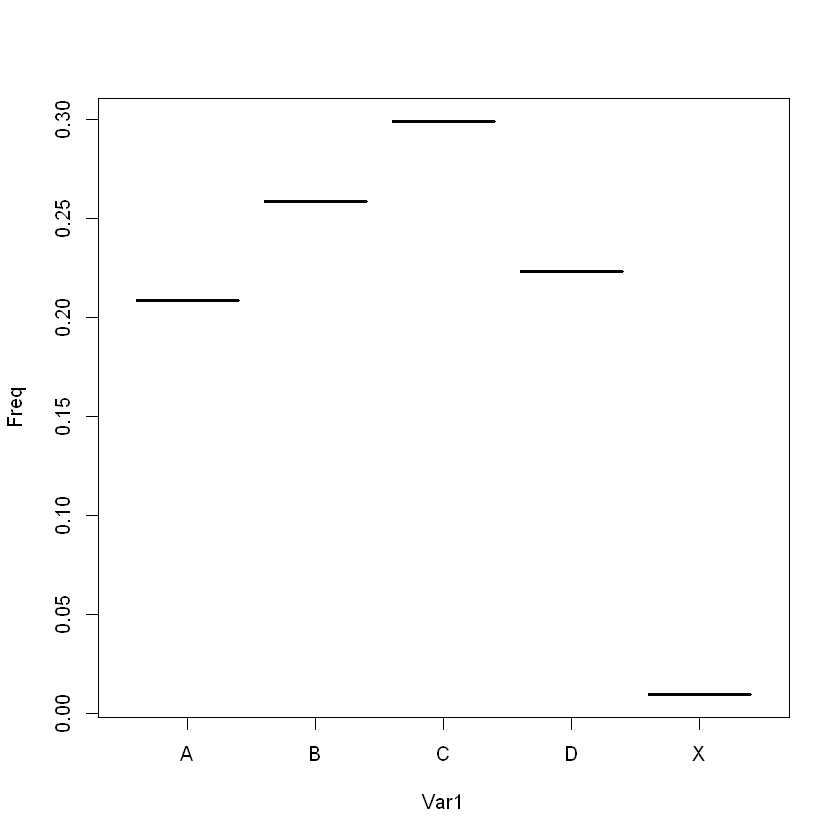

In [112]:
plot(x)

In [113]:
summary(test1_data)

ERROR: Error in summary(test1_data): object 'test1_data' not found


In [114]:
test_data

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
7,АНПІЛОГОВ АНТОН,1,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,1,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,1,C,C,D,D,C,C,B,...,D,C,C,A,B,X,X,X,X,X
10,АНУКОЩУК РОМАН,1,B,C,C,C,B,A,B,...,B,C,C,C,B,B,A,C,C,B
11,ЮРКІВ ДЕНИС,1,D,C,B,C,D,C,B,...,B,C,B,D,A,B,B,D,A,A
13,ТАБАЧУК ОЛЕКСАНДР,1,B,B,A,C,C,D,C,...,D,C,B,C,B,A,C,D,C,A
14,ДЯЧУК ДАРИНА,1,C,B,D,A,C,B,B,...,A,D,C,A,C,A,C,D,A,B


### 4.1. Ва

In [135]:
answers_matrix_v2 <-  test_data_v2 |> select(Q1:Q20) |> as.matrix()
answers_matrix_v2

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
A,C,A,B,B,C,D,B,D,B,C,A,D,D,C,D,C,A,A,C
D,B,D,A,B,B,C,D,C,A,C,C,A,D,B,A,C,C,D,D
B,D,A,A,B,D,C,C,D,D,C,B,A,D,B,C,D,C,C,A
D,B,D,A,D,D,A,D,B,B,C,B,A,D,B,A,C,D,A,C
B,C,A,A,B,A,D,D,C,B,C,B,D,C,B,C,A,A,D,B
A,C,C,A,C,C,D,B,B,A,C,B,D,B,B,A,B,B,C,B
A,B,D,A,C,D,A,A,C,D,C,A,A,D,A,D,B,A,D,C
D,C,B,D,D,B,A,B,A,D,C,A,D,B,C,D,C,D,C,A
B,C,C,B,A,C,C,B,C,B,A,C,C,C,C,B,C,A,A,C
C,B,C,B,B,A,C,A,C,D,D,A,A,D,A,B,A,D,B,B


In [136]:
correct_answers_v2 <- keys_data$V2
correct_answers_v2

[1] "С" "B" "A" "C" "B" "C" "D" "A" "D" "D" "A" "C" "C" "A" "A" "D" "C" "A" "C"
[20] "D"

In [131]:
answers_matrix_v2 <-  test_data_v2 |> select(Q1:Q20) |> as.matrix()
correct_answers_v2 <- keys_data$V2
final_matrix_v2 <- matrix(FALSE, nrow = nrow(answers_matrix_v2), ncol = ncol(answers_matrix_v2))

for(i in 1:ncol(answers_matrix_v2)) 
{
    final_matrix_v2[,i] <- ifelse(answers_matrix_v2[, i] == correct_answers_v2[i], 1, 0)
}
colnames(final_matrix_v2) <- colnames(answers_matrix_v2)
rownames(final_matrix_v2) <- test_data_v2$Std

In [132]:
final_matrix_v2

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Басок Максим Олександрович,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0
Башмаков Богдан Олегович,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
Бенедик Олександр Сергійович,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
Боженко Анастасія Ігорівна,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Власенко Андрій Максимович,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Грицаюк Богдан Вікторович,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Долженко Дмитро Юрійович,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0
Івасюк Денис Михайлович,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
Йойна Дарина Сергіївна,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0
Киричук Олексій Миколайович,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [130]:


grade <- 15/20

final_grades_v2 <- test_data_v2 |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix_v2)) |>
    bind_cols(test_data_v2 |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix_v2) <- colnames(answers_matrix_v2)

final_grades_v2 |> select(1:4, 25:27) |> filter(!is.na(Check))

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,5.25,5,3.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,3.00,6,4.50
54,Стуга Едуард Леонідович,КН-1(5)-1,8,3.00,5,3.75
